In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert('..', 1)
from py_utils.FINDER_test_utils import *
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

TypeError: 'str' object cannot be interpreted as an integer

In [11]:
x = [0,2,3,4,5,6,7,8]
x_1 = [x[i:i+2] for i in range(0,8,2)]
x_1

[[0, 2], [3, 4], [5, 6], [7, 8]]

In [12]:
np.argmin(x)

0

In [10]:
10 % 5

0

In [61]:
def plot_valid_performance(dfs_valid, dfs_loss, min_points, labels, subtitle, save_path):
    mpl.style.use('seaborn-paper')

    fig, axs = plt.subplots(1, 2, figsize=(10,3.5), sharex=False, sharey=False)

    for k in range(len(dfs_valid)):
        min_point = np.round(min_points[k][0][1] * 100 - 100,4)
        axs[0].plot(dfs_valid[k]['iteration'], dfs_valid[k]['opt_approx'] * 100 - 100, label=f'{labels[k]} ({min_point} %)')
        axs[1].plot(dfs_loss[k]['iteration'], dfs_loss[k]['loss'], label=f'{labels[k]} ({min_point} %)')

    for k, min_point in enumerate(min_points):
        axs[0].scatter(x=min_point[0][0], y=min_point[0][1] * 100 - 100, facecolors='none', linewidths=2, edgecolors='red')
                    # label=f'FINDER training {k+1} best model ({np.round(min_point[0][0],4)})')
    axs[0].grid(True, axis='both')
    axs[0].legend(loc='upper left')
    axs[0].axhline(y = 1.47, color = 'black', linestyle = '--', label='S2V-DQN (1.47 %)')
    axs[0].axhline(y = 0.00004, color = 'green', linestyle = '--', label='Fu et al.(0.00004 %)')
    axs[0].set_ylabel('Relative error to optimal [%]')
    axs[0].set_xlabel('Iteration')
    axs[0].set_ylim([0, 25])
    
    axs[1].grid(True, axis='both')
    axs[1].legend(loc='upper left')
    axs[1].set_ylabel('Training loss')
    axs[1].set_xlabel('Iteration')

    plt.suptitle(subtitle)
    plt.tight_layout()

    plt.savefig(save_path, dpi=400)

# Plot training process of current model

In [5]:
NUM_MIN = 20
NUM_MAX = 20
data_path = f'models/tsp_2d/nrange_{NUM_MIN}_{NUM_MAX}'
dfs_valid = []
dfs_loss = []
fnames = os.listdir(f'{data_path}')
for fname in fnames:
    if '.csv' in fname and 'Validation' in fname:
        dfs_valid.append(pd.read_csv(f'{data_path}/{fname}', names=['iteration', 'opt_approx'], delimiter=' '))
    elif '.csv' in fname and 'Loss' in fname:
        dfs_loss.append(pd.read_csv(f'{data_path}/{fname}', names=['iteration', 'loss'], delimiter=' '))

In [6]:
min_points = []
for df in dfs_valid:
    min_point = df.loc[df['opt_approx'] == df['opt_approx'].min(), :].to_numpy()
    min_points.append(min_point)

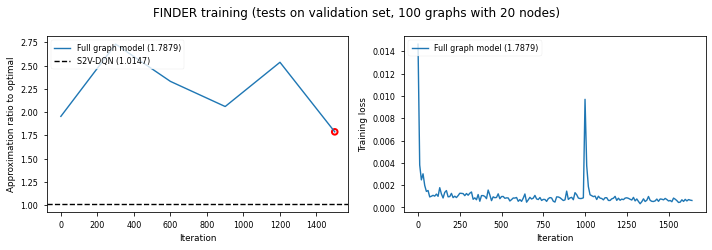

In [9]:
labels = ['Full graph model']
subtitle = 'FINDER training (tests on validation set, 100 graphs with 20 nodes)'
save_path = 'plots/training_process_current.png'
plot_valid_performance(dfs_valid, dfs_loss, min_points, labels, subtitle, save_path)

# Plot training process of saved models

In [35]:
def extract_train_info(dfs_valid, dfs_loss, model_names, base_path):
    for folder in model_names:
        fnames = os.listdir(f'{base_path}/{folder}')
        for fname in fnames:
            if '.csv' in fname and not 'Loss' in fname:
                dfs_valid.append(pd.read_csv(f'{base_path}/{folder}/{fname}', names=['iteration', 'opt_approx'], delimiter=' '))
            elif '.csv' in fname and 'Loss' in fname:
                dfs_loss.append(pd.read_csv(f'{base_path}/{folder}/{fname}', names=['iteration', 'loss'], delimiter=' '))
    return dfs_valid, dfs_loss

In [49]:
# base_path = './test_models'
# model_names = [
#     'concat_decoder_2021-10-16_23:59:37_len_100308',
#     'dropout_2021-10-17_07:11:04_len_100242',
#     'probability_masking_2021-10-17_14:20:41_len_100175',
#     'sparsified_graph_2021-10-17_19:32:44_len_100337',
#     'standard_2021-10-18_02:36:38_len_100324'
# ]
base_path_0 = './test_models'
model_names_0 = [
    'standard_2021-10-18_02:36:38_len_100324'
]
base_path_1 = './saved_models/tsp_2d/nrange_20_20'
model_names_1 = [
    'AGNN_no_help_only_start_end_+_edge_prob_+_unfixed_start_2021-09-08_17:31:23_len_100143'
]
dfs_valid = []
dfs_loss = []

In [50]:
# dfs_valid, dfs_loss = extract_train_info(dfs_valid, dfs_loss, model_names, base_path)
dfs_valid, dfs_loss = extract_train_info(dfs_valid, dfs_loss, model_names_0, base_path_0)
dfs_valid, dfs_loss = extract_train_info(dfs_valid, dfs_loss, model_names_1, base_path_1)

In [51]:
len(dfs_valid)

2

In [41]:
min_points = []
for df in dfs_valid:
    min_point = df.loc[df['opt_approx'] == df['opt_approx'].min(), :].to_numpy()
    min_points.append(min_point)

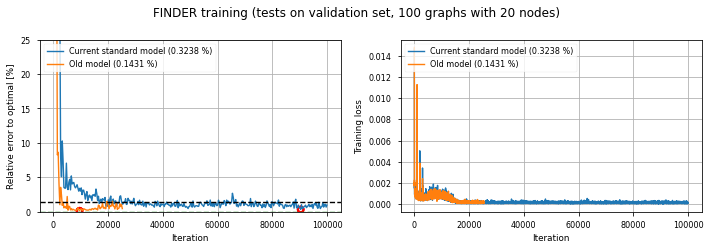

In [62]:
# labels = ['Sum state representation', 'Dropout 0.1', 'Probability masking', 'Sparsified graph', 'Standard']
labels = ['Current standard model', 'Old model']
subtitle = 'FINDER training (tests on validation set, 100 graphs with 20 nodes)'
save_path = 'plots/training_process.png'
plot_valid_performance(dfs_valid, dfs_loss, min_points, labels, subtitle, save_path)

In [21]:
trainfolder_list = ['nrange_15_20_len_1038117']
df_list = []
for folder in trainfolder_list:
    fnames = os.listdir(base_path+folder)
    for fname in fnames:
        if '.csv' in fname:
            df_list.append(pd.read_csv(f'{base_path}{folder}/{fname}', names=['opt_approx']))
for df in df_list:
    df['iteration'] = np.array(df.index)*300
min_points = []
for df in df_list:
    min_point = df.loc[df['opt_approx'] == df['opt_approx'].min(), :].to_numpy()
    min_points.append(min_point)
min_points[0][0][0]

1.0381167529724464

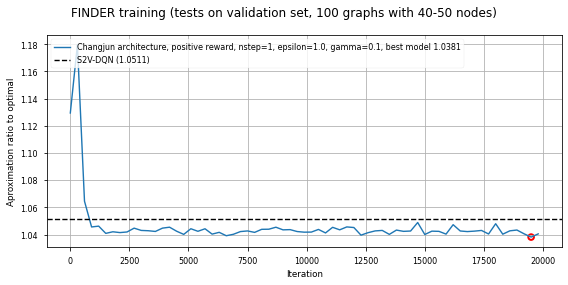

In [25]:
mpl.style.use('seaborn-paper')
#mpl.style.use('seaborn')
#minimum = df[df['opt_approx'] == df['opt_approx'].min()]
minimum_test = 1.018
fig, axs = plt.subplots(1, 1, figsize=(8,4), sharex=True, sharey=True)
#df.plot(x='iteration', y='opt_approx', ax=axs, ylim=None, label='FINDER training')
df_list[0].plot(x='iteration', y='opt_approx', ax=axs, ylim=None, label=f'Changjun architecture, positive reward, nstep=1, epsilon=1.0, gamma=0.1, best model {np.round(min_points[0][0][0],4)}')

for k, min_point in enumerate(min_points):
    axs.scatter(x=min_point[0][1], y=min_point[0][0], facecolors='none', linewidths=2, edgecolors='red')
                # label=f'FINDER training {k+1} best model ({np.round(min_point[0][0],4)})')
axs.grid(True, axis='both')
axs.axhline(y = 1.0511, color = 'black', linestyle = '--', label='S2V-DQN (1.0511)')
axs.legend(loc='upper left')
axs.set_ylabel('Aproximation ratio to optimal')
axs.set_xlabel('Iteration')
plt.suptitle('FINDER training (tests on validation set, 100 graphs with 40-50 nodes)')
plt.tight_layout()

plt.savefig('plots/training_process_large_valid_set.png', dpi=400)